In [2]:
import warnings
warnings.filterwarnings('ignore')

### Run in collab
<a href="https://colab.research.google.com/github/racousin/rl_introduction/blob/master/notebooks/4_deep_Q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/racousin/rl_introduction.git > /dev/null 2>&1

In [5]:
from rl_introduction.rl_introduction.tools import Agent, DeepAgent, plot_values_lake, policy_improvement, discount_cumsum, run_experiment_episode_train
from rl_introduction.rl_introduction.render_colab import gym_render

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2891776/45929032 bytes (6.3%)7208960/45929032 bytes (15.7%)11542528/45929032 bytes (25.1%)15777792/45929032 bytes (34.4%)20152320/45929032 bytes (43.9%)24526848/45929032 bytes (53.4%)28844032/45929032 bytes (62.8%)33128448/45929032 bytes (72.1%)37380096/45929032 bytes (81.4%)41746432/45929032 bytes (90.9%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root/.imageio/ffmpeg/ffmpeg-linux64-v3.3.1.


### Objective
In order to tackle difficult problems (large action-state space and complexity), we will use deep Q learning.

**Complete the TODO steps! Good luck!**

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, concatenate, Dropout
from tensorflow.keras.optimizers import Adam
import random
from tensorflow.keras.models import Model, load_model
import gym
from time import time,sleep
import numpy as np
import gym
import matplotlib.pyplot as plt
from collections import deque
sns.set_style("darkgrid")

In [7]:
# We will experiment our algo with CartPole
env = gym.make('CartPole-v0')

# Deep Q-learning

We will parametrize The Q function.
In other words, we are looking for $\theta \in \mathbb{R}^d$ such as 
$\forall s, Q_\theta(s,a) = \mathbb{E}_\pi[G_t | S_t = s, A_t = a]$. We follow the same idea as q-learning:
we learn and update $Q_\theta(S_t,A_t)$ using the target $R_{t+1}+\gamma \max_a Q_\theta(S_{t+1},a)$. A natural loss is the mean square error:

$L(\theta) = \mathbb{E}_{s,a\sim Q} [(y - Q(s,a,\theta))^2]$



$y = R_{t+1} + \gamma \max_a Q(S_{t+1},a,\theta)$

We have 2 ways to write our function:
1. $Q_\theta : S\times A \rightarrow \mathbb{R}$

in this case greedy policy looks like $\pi(.|s) = \arg\max([Q_\theta(s,a_0), Q_\theta(s,a_1),... Q_\theta(s,a_{dim(A)}]) $

The target is $y = R_{t+1} + \gamma \max_a Q(S_{t+1},a,\theta)$


2. $Q_\theta : S \rightarrow \mathbb{R}^{dim(A)}$

in this case greedy policy looks like $\pi(.|s) = \arg\max(Q_\theta(s))$

The target is $y_i = R_{t+1} + \gamma \max_a Q(S_{t+1},a,\theta)$ for i corresponding to the played action, $Q_\theta(s_t)_i$ otherwise.

In other words, if we played $a$ (second action) in $s$, and we obseved $r$ and $s'$, our target will be (assuming we have 3 actions):

$\begin{aligned}
y_0 =& Q(s,a,\theta)_0\\
y_1 =&R_{t+1} + \gamma \max_a Q(S_{t+1},a,\theta)\\
y_2 =&Q(s,a,\theta)_2
\end{aligned}$

And our loss:

$L(\theta) = (R_{t+1} + \gamma \max_a Q(S_{t+1},a,\theta) - Q(s,a,\theta)_1)^2$

In practice implementation 2 is often easier to implement. So it is what we will do!

In [ ]:
#TODO: write a keras model that represent our parametrized Q function
# We should be able to run Q.predict([s]) and it should return [[Q(s,a_0), Q(s,a_1) .. Q(s,q_m)]] where m is action size
def build_model(state_dim, action_dim):
    return model
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
model = build_model(state_dim, action_dim)
model.predict(np.random.rand(1,state_dim))

In [9]:
#Done: write a keras model that represent our parametrized Q function
# Example of our parametrize Q function (case 2)
def build_model(state_dim, action_dim):
    input_state = Input(name='input_state', shape=(state_dim,), dtype='float32')
    x = Dense(2, activation='relu')(input_state)
    x = Dense(2, activation='relu')(x)
    x = Dense(action_dim, activation='linear')(x)
    model = Model(inputs=input_state, outputs=x)
    model.compile(loss='mse',optimizer=Adam(learning_rate=1e-2))
    return model
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
model = build_model(state_dim, action_dim)
model.predict(np.random.rand(1,state_dim))

1/1 [==============================] - 4s 4s/step


array([[ 0.09100284, -0.06346741]], dtype=float32)

### TODO 0 : write deep Q learning interaction with the environment

In [ ]:
#TODO: write the action choosen by our naive Q learning algorithm.
# It should be a = argmax(Q(s))
class DeepQAgent(DeepAgent):
    def __init__(self, env, compiled_model, gamma = .99, epsilon = .1):
        super().__init__(env, gamma, epsilon) 
        self.model = compiled_model
        self.model.summary()
    
    def act(self, state):
      # complete here
      pass

In [10]:
#Done: write the action choosen by our naive Q learning algorithm.
# It should be a = argmax(Q(s))
class DeepQAgent(DeepAgent):
    def __init__(self, env, compiled_model, gamma = .99, epsilon = .1):
        super().__init__(env, gamma, epsilon) 
        self.model = compiled_model
        self.model.summary()
    
    def act(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.env.action_space.n)
        else:
            predicted_Qs = self.model.predict(state.reshape(1, -1), verbose=0)[0]
            return np.argmax(predicted_Qs) 

In [11]:
def run_experiment_episode(env, agent, nb_episode):
    rewards = np.zeros(nb_episode)
    for i in range(nb_episode):
        state = env.reset()
        done = False
        rews = []
        while done is False:
            action = agent.act(state)
            current_state = state
            state, reward, done, info = env.step(action)
            rews.append(reward)
        rewards[i] = sum(rews)
        print('episode: {} - cum reward {}'.format(i, rewards[i]))
    return rewards

In [24]:
#TODO: interact with the environment through episode and display the return

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_state (InputLayer)    [(None, 4)]               0         
                                                                 
 dense_9 (Dense)             (None, 2)                 10        
                                                                 
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 2)                 6         
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
episode: 0 - cum reward 9.0
episode: 1 - cum reward 8.0
episode: 2 - cum reward 9.0
episode: 3 - cum reward 9.0
episode: 4 - cum reward 10.0
episode: 5 - cum reward 10.0
episode: 6 - cum reward 9

Text(0.5, 1.0, 'cumulative reward per episode - naive_q_agent')

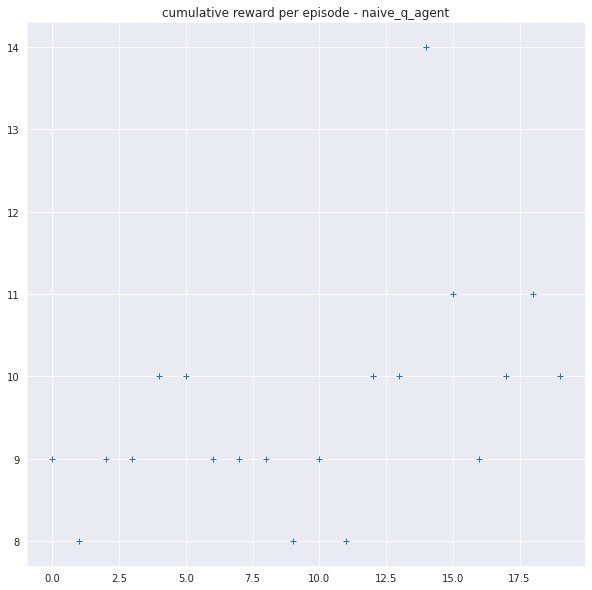

In [25]:
#Done: interact with the environment through episode and display the return
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
model = build_model(state_dim, action_dim)
naive_q_agent = DeepQAgent(env, model)
rewards = run_experiment_episode(env, naive_q_agent, 20)
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(rewards,'+')
ax.set_title('cumulative reward per episode - naive_q_agent')

In [ ]:
gym_render(env_name='CartPole-v0', directory='./video', agent = naive_q_agent, slow_coeff=10)

### TODO 1) : write deep Q learning update

In [12]:
#TODO: write deep Q learning update
# Compute the Q target and update the model with keras
class DeepQAgent(DeepAgent):
    def __init__(self, env, compiled_model, gamma = .99, epsilon = .1):
        super().__init__(env, gamma, epsilon) 
        self.model = compiled_model
        self.model.summary()
    
    def act(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.env.action_space.n)
        else:
            predicted_Qs = self.model.predict(state.reshape(1, -1), verbose=0)[0]
            return np.argmax(predicted_Qs) 
    
    def train(self, current_state, action, reward, next_state, done):
        pass #complete here

In [13]:
#Done: write deep Q learning update
class DeepQAgent(DeepAgent):
    def __init__(self, env, compiled_model, gamma = .99, epsilon = .1):
        super().__init__(env, gamma, epsilon)
        
        self.model = compiled_model
        self.model.summary()
    
    def act(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.env.action_space.n)
        else:
            predicted_Qs = self.model.predict(state.reshape(1, -1), verbose=0)[0]
            return np.argmax(predicted_Qs) 
    
    def train(self, current_state, action, reward, next_state, done):
        predicted_Q_nexts = self.model.predict(next_state.reshape(1, -1), verbose=0)[0]
        target = self.model.predict(current_state.reshape(1, -1), verbose=0)[0]
        if done is True:
            target[action] = reward
        else:
            target[action] = reward + self.gamma * np.max(predicted_Q_nexts)
        self.model.train_on_batch(current_state.reshape(1, -1), target.reshape(1, -1))

In [14]:
#TODO: train it and display learning using run_experiment_episode_train(env, q_agent, nb_episode)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_state (InputLayer)    [(None, 4)]               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
episode: 0 - cum reward 13.0
episode: 1 - cum reward 10.0
episode: 2 - cum reward 9.0
episode: 3 - cum reward 10.0
episode: 4 - cum reward 9.0
episode: 5 - cum reward 11.0
episode: 6 - cum reward

Text(0.5, 1.0, 'cumulative reward per episode - deep_q_agent')

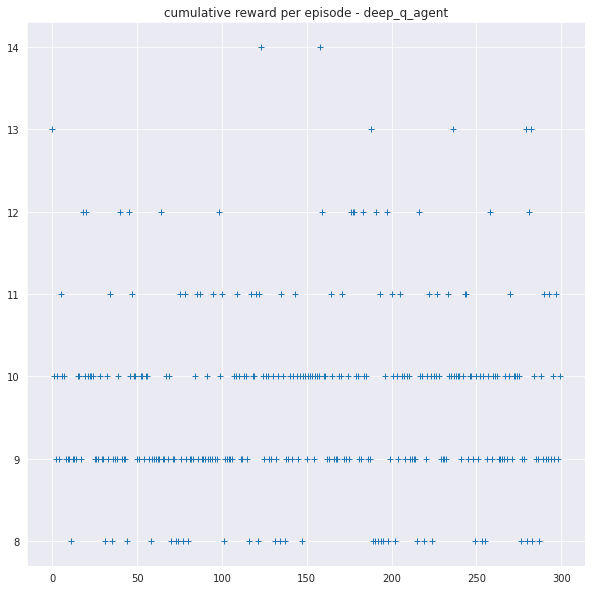

In [15]:
#Done: train it and display learning using run_experiment_episode_train(env, q_agent, nb_episode) it
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
model = build_model(state_dim, action_dim)
q_agent = DeepQAgent(env, model)
rewards = run_experiment_episode_train(env, q_agent, 300)
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(rewards,'+')
ax.set_title('cumulative reward per episode - deep_q_agent')

### TODO 2) : Try different hyerparamters models (number of layers, nodes) and compare learning

In [16]:
### TODO 2) : Try different hyerparamters models (number of layers, nodes, activation) and compare learning
def your_build_model(state_dim, action_dim):
    input_state = Input(name='input_state', shape=(state_dim,), dtype='float32')
    model = Model(inputs=input_state, outputs=input_state)
    model.compile(loss='mse',optimizer=Adam(learning_rate=1e-2))
    return model

In [17]:
### Done 2) : Try different hyerparamters models (number of layers, nodes) and compare learning
def your_build_model(state_dim, action_dim):
    input_state = Input(name='input_state', shape=(state_dim,), dtype='float32')
    x = Dense(32, activation='relu')(input_state)
    x = Dense(32, activation='relu')(x)
    x = Dense(action_dim, activation='linear')(x)
    model = Model(inputs=input_state, outputs=x)
    model.compile(loss='mse',optimizer=Adam(learning_rate=1e-2))
    return model

In [18]:
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
your_model = your_build_model(state_dim, action_dim)
your_q_agent = DeepQAgent(env, your_model)
your_rewards = run_experiment_episode_train(env, your_q_agent, 300)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_state (InputLayer)    [(None, 4)]               0         
                                                                 
 dense_6 (Dense)             (None, 32)                160       
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________
episode: 0 - cum reward 9.0
episode: 1 - cum reward 9.0
episode: 2 - cum reward 10.0
episode: 3 - cum reward 10.0
episode: 4 - cum reward 9.0
episode: 5 - cum reward 10.0
episode: 6 - cum r

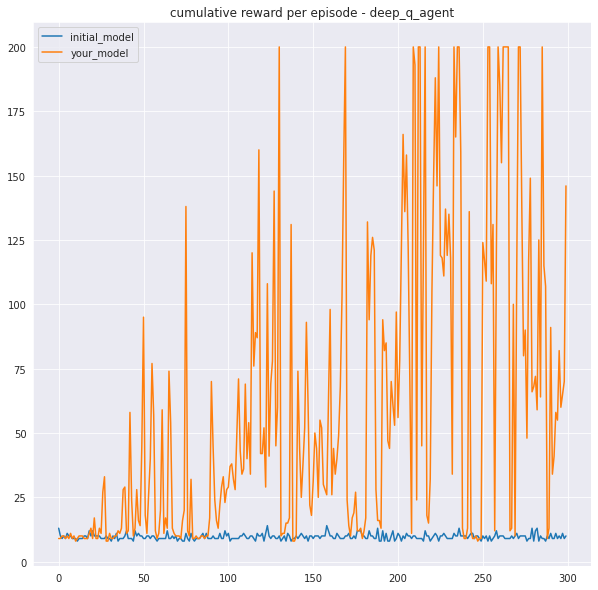

In [19]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(rewards,label='initial_model')
ax.plot(your_rewards,label='your_model')
ax.set_title('cumulative reward per episode - deep_q_agent')
ax.legend()

### Experience replay

In order to improve stability, we will keep memory of the previous moves and use it to update our model


$L_i(\theta_i) = \mathbb{E}_{(s, a, r, s') \sim U(D)} \left[ \left(r + \gamma \max_{a'} Q(s', a'; \theta_i^-) - Q(s, a; \theta_i)\right)^2 \right]$

### TODO 3) : Try different hyerparamters models (number of layers, nodes) and compare learning

In [ ]:
#TODO: write The function replay that return bacth from memory
# self.memory is a queue of size memory_size
# (x_batch, y_batch)_i is a random (state, target) from the memory
class DeepQAgent_experience_replay(DeepAgent):
    def __init__(self, env, compiled_model, gamma = .99, epsilon = .1, memory_size = 2000, batch_size = 100):
        super().__init__(env, gamma, epsilon)
        
        self.model = compiled_model
        self.model.summary()
        
        self.memory_size = memory_size
        self.batch_size = batch_size
        self.memory = deque(maxlen=memory_size)
        
    def replay(self, batch_size):
        pass #complete here
    
        
    def act(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.randint(self.env.action_space.n)
            return action
        predicted_Qs = self.model.predict(state.reshape(1, -1))[0]
        action = np.argmax(predicted_Qs) 
        return action
    
    def train(self, current_state, action, reward, next_state, done):
        self.memory.append([current_state, action, reward, next_state, done])
        x_batch, y_batch = self.replay(self.batch_size)
        loss = self.model.train_on_batch(x_batch, y_batch)

In [23]:
#Done: write The function replay that return bacth from memory
class DeepQAgent_experience_replay(DeepAgent):
    def __init__(self, env, compiled_model, gamma = .99, epsilon = .1, memory_size = 2000, batch_size = 100):
        super().__init__(env, gamma, epsilon)
        
        self.model = compiled_model
        self.model.summary()
        
        self.memory_size = memory_size
        self.batch_size = batch_size
        self.memory = deque(maxlen=memory_size)
    
    # easy loop way
    #def replay(self, batch_size):
    #    x_batch =  np.zeros((batch_size, self.state_size))
    #    y_batch =  np.zeros((batch_size, self.action_size))
    #    minibatch = random.sample(self.memory, min(len(self.memory), batch_size))
    #    for i, (state, action, reward, next_state, done) in enumerate(minibatch):
    #        target = self.model.predict(state.reshape(1,-1))[0]
    #        if done:
    #            target[action] = reward
    #        else:
    #            target[action] = reward + self.gamma * np.max(self.model.predict(next_state.reshape(1,-1)))
    #        x_batch[i] = state
    #        y_batch[i] = target
    #    return x_batch, y_batch
    
    #optimize way
    def replay(self, batch_size):
        minibatch = np.array(random.sample(self.memory, min(len(self.memory), batch_size)))
        states = np.vstack(np.array(minibatch)[:,0])
        actions = np.array(minibatch)[:,1].astype(int)
        rewards = np.array(minibatch)[:,2]
        next_states = np.vstack(np.array(minibatch)[:,3])
        dones = np.array(minibatch)[:,4]
        targets = self.model.predict(states, verbose=0)
        targets_next = self.model.predict(next_states, verbose=0)
        targets[np.arange(actions.size),actions] = rewards + (1 - dones) * self.gamma * np.max(targets_next, axis=1)
        return states, targets
    
    
    def act(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.randint(self.env.action_space.n)
            return action
        predicted_Qs = self.model.predict(state.reshape(1, -1), verbose=0)[0]
        action = np.argmax(predicted_Qs) 
        return action
    
    def train(self, current_state, action, reward, next_state, done):
        self.memory.append([current_state, action, reward, next_state, done])
        x_batch, y_batch = self.replay(self.batch_size)
        loss = self.model.train_on_batch(x_batch, y_batch)

In [ ]:
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
model = your_build_model(state_dim, action_dim)

q_agent = DeepQAgent_experience_replay(env, model)
rewards = run_experiment_episode_train(env, q_agent, 200)
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(rewards,'+')
ax.set_title('cumulative reward per episode - memory_deep_q_agent')

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_state (InputLayer)    [(None, 4)]               0         
                                                                 
 dense_15 (Dense)            (None, 32)                160       
                                                                 
 dense_16 (Dense)            (None, 32)                1056      
                                                                 
 dense_17 (Dense)            (None, 2)                 66        
                                                                 
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________
episode: 0 - cum reward 10.0
episode: 1 - cum reward 15.0
episode: 2 - cum reward 11.0
episode: 3 - cum reward 30.0
episode: 4 - cum reward 10.0
episode: 5 - cum reward 28.0
episode: 6 - cu

# Other improvments

### epsilon decay
Decay how random you take an action

### clipping reward
$Q(s,a):=Q(s,a)+\alpha(clip(r+\gamma \arg\max(Q(s',a'))-Q(s,a), -1, 1))$

### clipping loss
tf.keras.losses.Huber(delta=1.)

### Double Q learning

DQN: A reinforcement learning algorithm that combines Q-Learning with deep neural networks to let RL work for complex, high-dimensional environments, like video games, or robotics.
Double Q Learning: Corrects the stock DQN algorithm’s tendency to sometimes overestimate the values tied to specific actions.
Prioritized Replay: Extends DQN’s experience replay function by learning to replay memories where the real reward significantly diverges from the expected reward, letting the agent adjust itself in response to developing incorrect assumptions.
Dueling DQN: Splits the neural network into two — one learns to provide an estimate of the value at every timestep, and the other calculates potential advantages of each action, and the two are combined for a single action-advantage Q function.